# Exploratory Data Analysis

Exploratory data analysis is the process of exploring your data, and it typically includes examining the structure and components of your dataset, the distributions of individual variables, and the relationships between two or more variables. The most heavily relied upon tool for exploratory data analysis is visualizing data using a graphical representation of the data. Data visualization is arguably the most important tool for exploratory data analysis because the information conveyed by graphical display can be very quickly absorbed and because it is generally easy to recognize patterns in a graphical display.

There are several goals of exploratory data analysis, which are:

    1. To determine if there are any problems with your dataset.

    2. To determine whether the question you are asking can be answered by the data that you have.

    3. To develop a sketch of the answer to your question.

## Question

1) How does the students’ performance compare across the math, reading, and writing exam results?
2) Is there a correlation between gender and academic performance?
3) Does the test preparation course offered positively or negatively impact the exam results?
4) Does a student’s lunch type impact their academic performance?

In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#matplotlib inline

## Read in your data

The next task in any exploratory data analysis is to read in some data. Sometimes the data will come in a very messy format and you’ll need to do some cleaning. Other times, someone else will have cleaned up that data for you so you’ll be spared the pain of having to do the cleaning.

In [174]:
scores = pd.read_csv('../data/StudentsPerformance.csv', 
                     dtype = {'gender':'category',
                              'race/ethnicity':'category',
                              'parental level of education':'category',
                              'lunch':'category',
                              'test preparation course':'category'})

In [175]:
scores.rename(columns=lambda x: x.strip(" ").replace(' ', '_'), inplace=True)

In [176]:
scores.dtypes

gender                         category
race/ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                        int64
reading_score                     int64
writing_score                     int64
dtype: object

## Check the Packaging

In [177]:
scores.shape

(1000, 8)

In [178]:
len(scores.index)

1000

In [179]:
len(scores.columns)

8

In [180]:
scores.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental_level_of_education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_preparation_course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading_score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing_score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [181]:
scores.sample(10)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
148,female,group D,bachelor's degree,standard,completed,68,75,81
725,male,group E,some college,standard,completed,81,74,71
253,male,group D,master's degree,standard,none,80,80,72
442,female,group A,some high school,free/reduced,none,59,73,69
407,female,group B,associate's degree,standard,none,82,80,77
517,female,group E,some college,standard,completed,66,74,73
569,male,group D,bachelor's degree,free/reduced,none,68,68,67
63,female,group C,associate's degree,standard,none,69,80,71
914,female,group B,associate's degree,free/reduced,none,46,61,55
410,female,group D,master's degree,standard,completed,70,71,74


## Look at the Top and the Bottom of your Data

In [182]:
scores.iloc[:,[0,2,3,5,6,7]].head(10)

,gender,parental_level_of_education,lunch,math_score,reading_score,writing_score
0,female,bachelor's degree,standard,72,72,74
1,female,some college,standard,69,90,88
2,female,master's degree,standard,90,95,93
3,male,associate's degree,free/reduced,47,57,44
4,male,some college,standard,76,78,75
5,female,associate's degree,standard,71,83,78
6,female,some college,standard,88,95,92
7,male,some college,free/reduced,40,43,39
8,male,high school,free/reduced,64,64,67
9,female,high school,free/reduced,38,60,50


In [183]:
scores.iloc[:,[0,2,3,5,6,7]].tail(10)

,gender,parental_level_of_education,lunch,math_score,reading_score,writing_score
990,male,high school,free/reduced,86,81,75
991,female,some high school,standard,65,82,78
992,female,associate's degree,free/reduced,55,76,76
993,female,bachelor's degree,free/reduced,62,72,74
994,male,high school,standard,63,63,62
995,female,master's degree,standard,88,99,95
996,male,high school,free/reduced,62,55,55
997,female,high school,free/reduced,59,71,65
998,female,some college,standard,68,78,77
999,female,some college,free/reduced,77,86,86


## Checking “n”s

### Gender

In [184]:
scores.gender.head(1000)

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: category
Categories (2, object): ['female', 'male']

In [185]:
scores.gender.unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [186]:
len(scores.gender.unique())

2

In [187]:
pd.Series(scores.gender.cat.categories)

0    female
1      male
dtype: object

### Lunch

In [188]:
scores.lunch.head(1000)

0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length: 1000, dtype: category
Categories (2, object): ['free/reduced', 'standard']

In [189]:
scores.lunch.unique()

['standard', 'free/reduced']
Categories (2, object): ['free/reduced', 'standard']

In [190]:
len(scores.lunch.unique())

2

In [191]:
pd.Series(scores.lunch.cat.categories)

0    free/reduced
1        standard
dtype: object

### Test preparation course

In [192]:
scores.test_preparation_course.head(1000)

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test_preparation_course, Length: 1000, dtype: category
Categories (2, object): ['completed', 'none']

In [193]:
scores.test_preparation_course.unique()

['none', 'completed']
Categories (2, object): ['completed', 'none']

In [194]:
len(scores.test_preparation_course.unique())

2

In [195]:
pd.Series(scores.test_preparation_course.cat.categories)

0    completed
1         none
dtype: object

### Parental level of education

In [196]:
scores.parental_level_of_education.head(1000)

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_level_of_education, Length: 1000, dtype: category
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree', 'some college', 'some high school']

In [197]:
scores.parental_level_of_education.unique()

['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree', 'some college', 'some high school']

In [198]:
len(scores.parental_level_of_education.unique())

6

In [199]:
pd.Series(scores.parental_level_of_education.cat.categories)

0    associate's degree
1     bachelor's degree
2           high school
3       master's degree
4          some college
5      some high school
dtype: object

## Make a plot

In [200]:
import seaborn as sns

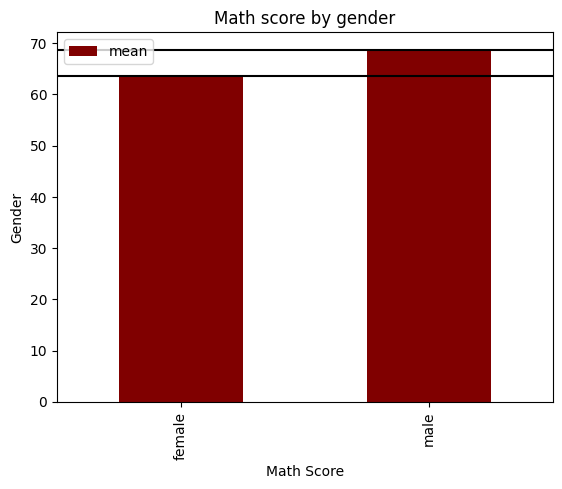

In [219]:
x = scores['math_score']
y = scores['gender']

summary = scores.groupby('gender')['math_score'].agg(['mean', 'std'])

summary.plot.bar(y='mean', xerr='std', color='maroon')
plt.title("Math score by gender")
plt.xlabel('Math Score')
plt.ylabel('Gender')
plt.show()

## Easy Sollution

Text(0, 0.5, 'Scores')

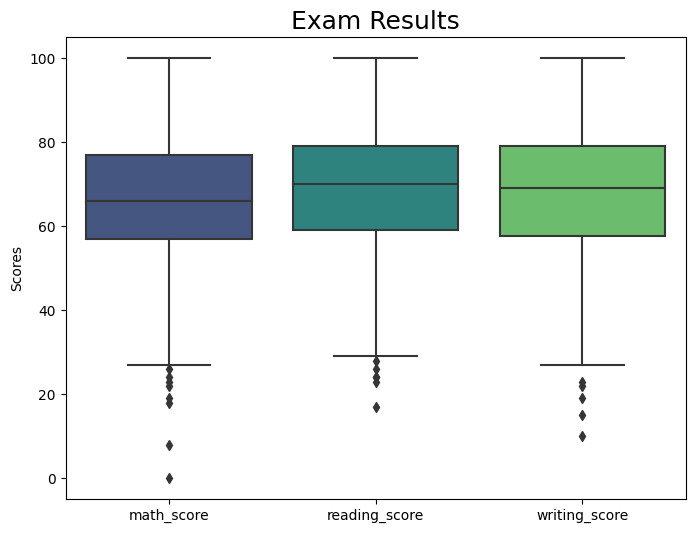

In [ ]:
# 1) How does the students’ performance compare across the math, reading, and writing exam results?

fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=scores, width=0.8, palette="viridis") #scores[['math_score','reading_score','writing_score']]
plt.title("Exam Results", fontsize=18)
g.set_ylabel("Scores")

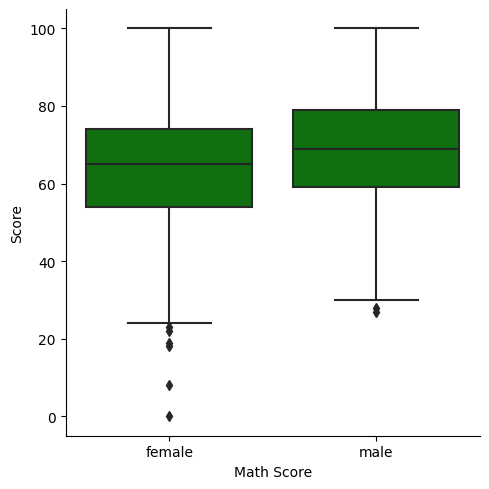

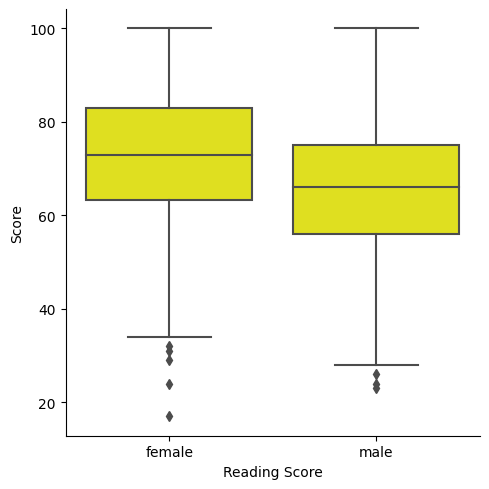

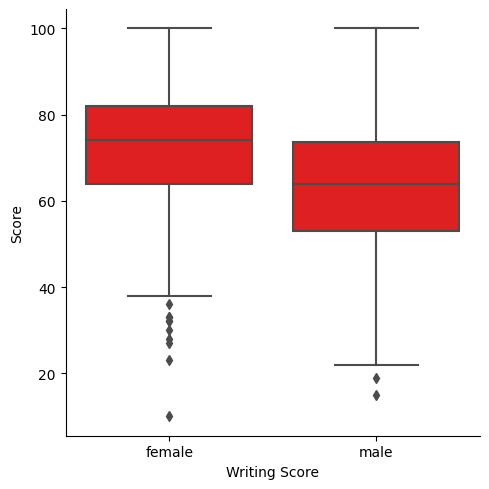

In [ ]:
# 2) Is there a correlation between gender and academic performance?

g = sns.catplot(data=scores,x='gender', y='math_score', kind='box', aspect=1.0, color='Green')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Math Score")

g = sns.catplot(data=scores,x='gender', y='reading_score', kind='box', aspect=1.0, color='Yellow')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Reading Score")

g = sns.catplot(data=scores,x='gender', y='writing_score', kind='box', aspect=1.0, color='Red')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Writing Score")

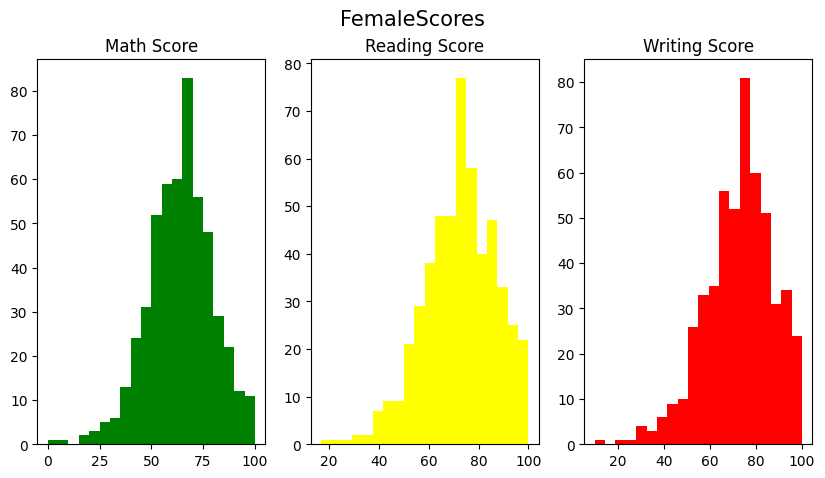

In [ ]:
gender='female'
df_filtered=scores[scores['gender']==gender]

fig, ax=plt.subplots(1,3,figsize=(10,5))
ax[0].hist(df_filtered['math_score'],bins=20,color='green')
ax[0].set_title("Math Score")
ax[1].hist(df_filtered['reading_score'],bins=20,color='yellow')
ax[1].set_title("Reading Score")
ax[2].hist(df_filtered['writing_score'],bins=20,color='red')
ax[2].set_title("Writing Score")

fig.suptitle(f"{gender.capitalize()}Scores", fontsize=15)
plt.show()

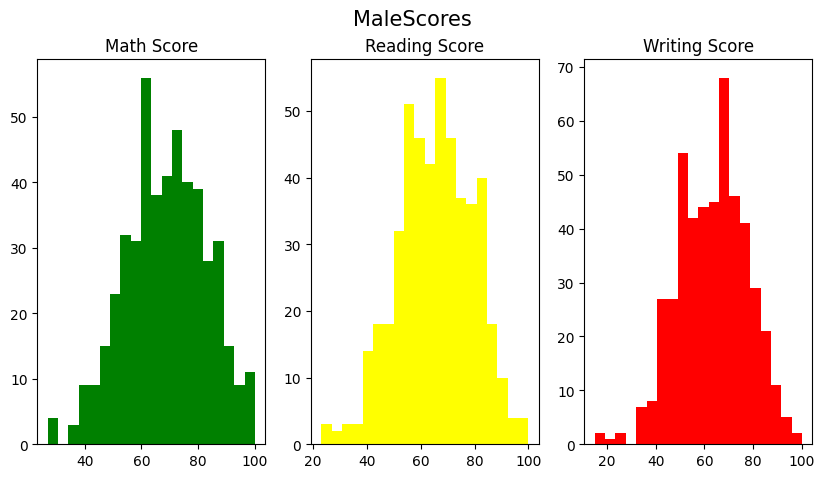

In [ ]:
gender='male'
df_filtered=scores[scores['gender']==gender]

fig, ax=plt.subplots(1,3,figsize=(10,5))
ax[0].hist(df_filtered['math_score'],bins=20,color='green')
ax[0].set_title("Math Score")
ax[1].hist(df_filtered['reading_score'],bins=20,color='yellow')
ax[1].set_title("Reading Score")
ax[2].hist(df_filtered['writing_score'],bins=20,color='red')
ax[2].set_title("Writing Score")

fig.suptitle(f"{gender.capitalize()}Scores", fontsize=15)
plt.show()

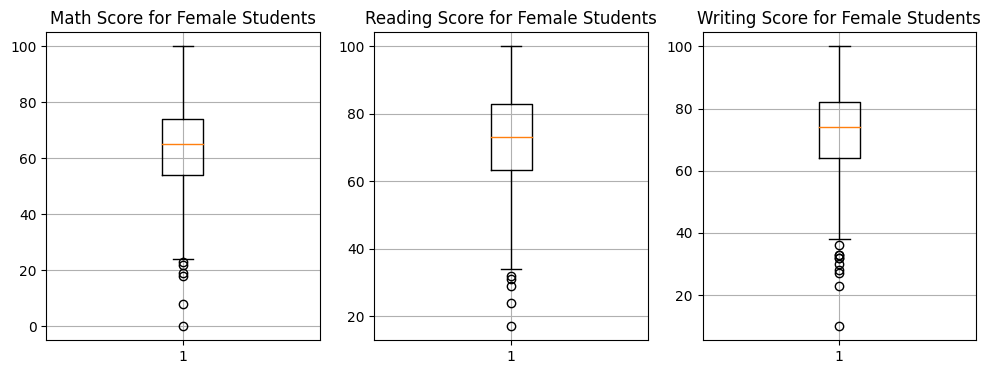

In [ ]:
female_df=scores[scores['gender']=='female']

fig, ax=plt.subplots(1,3,figsize=(12,4))
ax[0].boxplot(female_df['math_score'])
ax[0].set_title('Math Score for Female Students')
ax[0].grid(True)
ax[1].boxplot(female_df['reading_score'])
ax[1].set_title('Reading Score for Female Students')
ax[1].grid(True)
ax[2].boxplot(female_df['writing_score'])
ax[2].set_title("Writing Score for Female Students")
ax[2].grid(True)
plt.show()

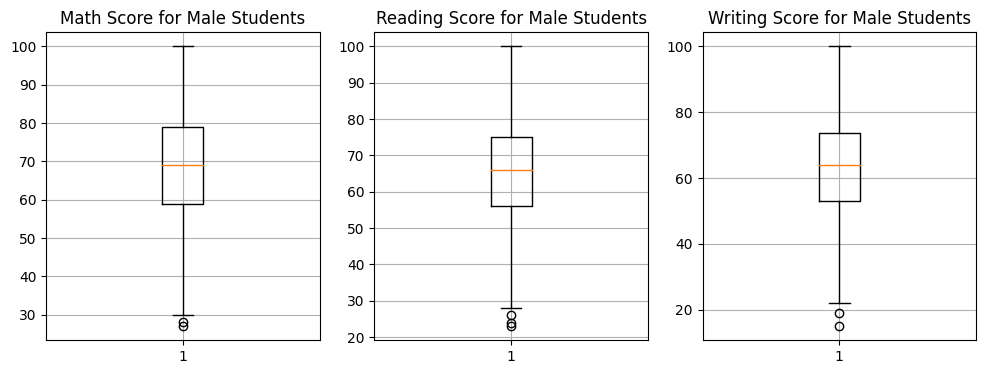

In [ ]:
female_df=scores[scores['gender']=='male']

fig, ax=plt.subplots(1,3,figsize=(12,4))
ax[0].boxplot(female_df['math_score'])
ax[0].set_title('Math Score for Male Students')
ax[0].grid(True)
ax[1].boxplot(female_df['reading_score'])
ax[1].set_title('Reading Score for Male Students')
ax[1].grid(True)
ax[2].boxplot(female_df['writing_score'])
ax[2].set_title("Writing Score for Male Students")
ax[2].grid(True)
plt.show()

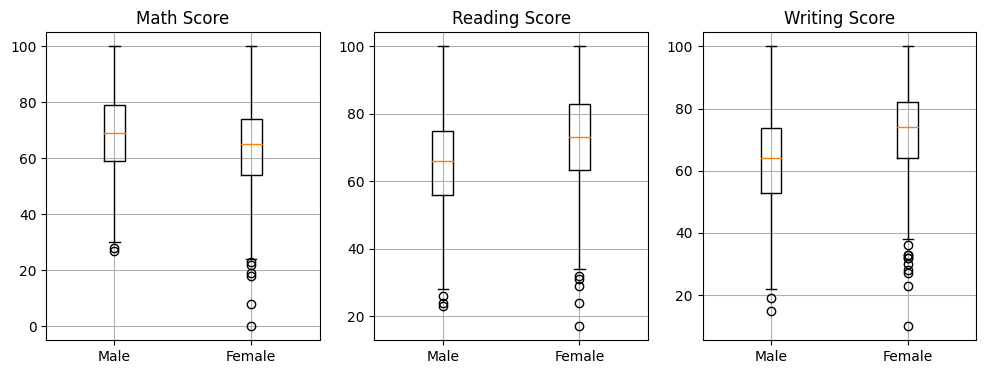

In [ ]:
female_df=scores[scores['gender']=='female']
male_df=scores[scores['gender']=='male']

fig, ax=plt.subplots(1,3,figsize=(12,4))

ax[0].boxplot([male_df['math_score'],female_df['math_score']])
ax[0].set_title('Math Score')
ax[0].set_xticklabels(['Male', 'Female'])
ax[0].grid(True)
ax[1].boxplot([male_df['reading_score'],female_df['reading_score']])
ax[1].set_title('Reading Score')
ax[1].set_xticklabels(['Male', 'Female'])
ax[1].grid(True)
ax[2].boxplot([male_df['writing_score'],female_df['writing_score']])
ax[2].set_title('Writing Score')
ax[2].set_xticklabels(['Male', 'Female'])
ax[2].grid(True)
plt.show()

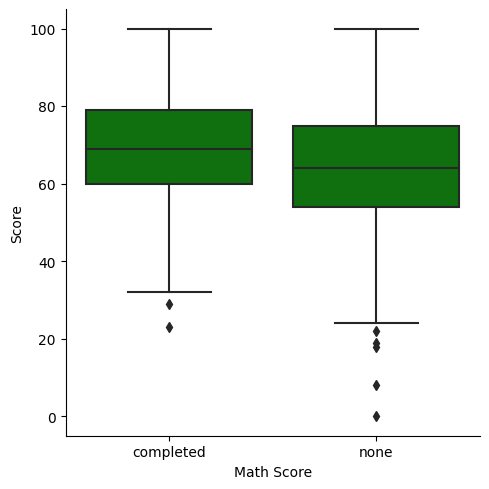

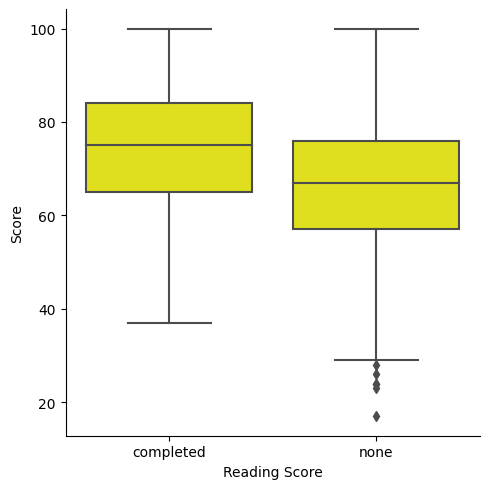

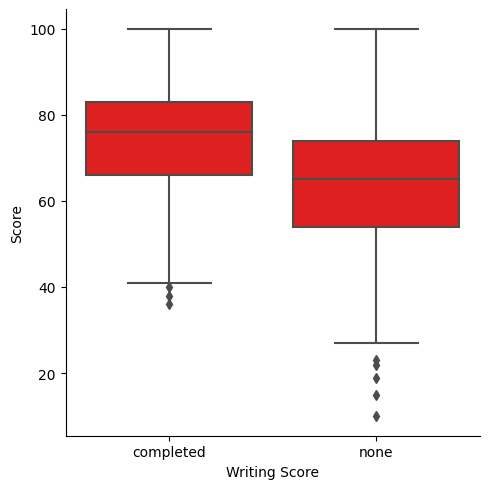

In [ ]:
# 3) Does the test preparation course offered positively or negatively impact the exam results?

g = sns.catplot(data=scores,x='test_preparation_course', y='math_score', kind='box', aspect=1.0, color='Green')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Math Score")

g = sns.catplot(data=scores,x='test_preparation_course', y='reading_score', kind='box', aspect=1.0, color='Yellow')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Reading Score")

g = sns.catplot(data=scores,x='test_preparation_course', y='writing_score', kind='box', aspect=1.0, color='Red')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Writing Score")

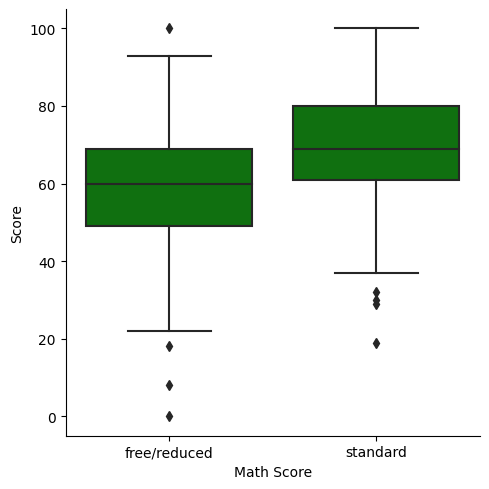

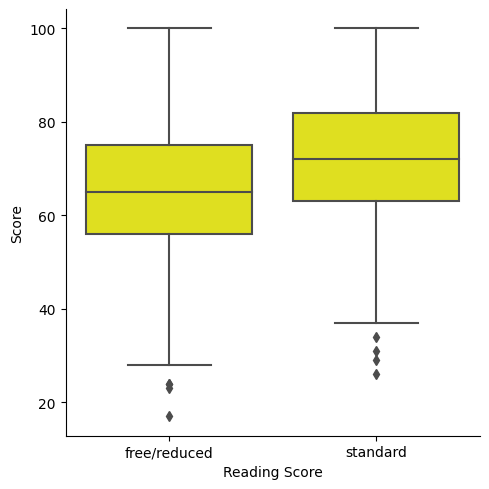

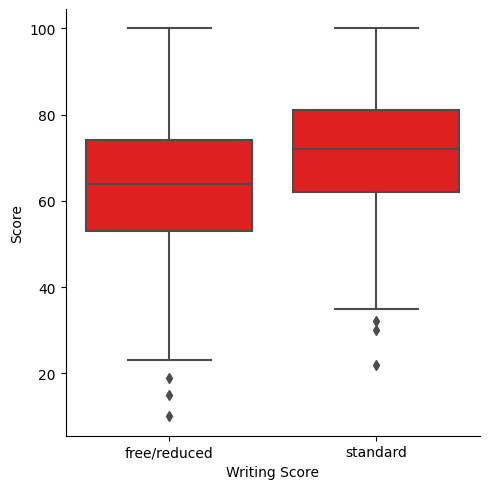

In [ ]:
# 4) Does a student’s lunch type impact their academic performance?

g = sns.catplot(data=scores,x='lunch', y='math_score', kind='box', aspect=1.0, color='Green')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Math Score")

g = sns.catplot(data=scores,x='lunch', y='reading_score', kind='box', aspect=1.0, color='Yellow')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Reading Score")

g = sns.catplot(data=scores,x='lunch', y='writing_score', kind='box', aspect=1.0, color='Red')
g.set_axis_labels("", "Score")
g.set_xticklabels(rotation=0)
g.set_xlabels("Writing Score")